In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8w7y-2bfp", limit=800000)

# Convert to pandas DataFrame
datos_df = pd.DataFrame.from_records(results)

datos_df




C:\Users\Isabel\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,curs,sexe,grup_edat,resid_ncia_municipi_alumne,codi_resid_ncia_municipi,municipi_centre,codi_municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,ABRERA,08001,EDUCACIÓ INFANTIL,PÚBLIC,38
1,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,ESPARREGUERA,08076,EDUCACIÓ INFANTIL,PRIVAT,1
2,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,L'HOSPITALET DE LLOBREGAT,08101,EDUCACIÓ INFANTIL,PÚBLIC,1
3,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,OLESA DE MONTSERRAT,08147,EDUCACIÓ INFANTIL,PRIVAT,8
4,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,OLESA DE MONTSERRAT,08147,EDUCACIÓ INFANTIL,PÚBLIC,1
...,...,...,...,...,...,...,...,...,...,...
779879,2021/2022,HOME,Major de 20 anys,BADALONA,08015,BADALONA,08015,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779880,2021/2022,HOME,Major de 20 anys,BARCELONA,08019,BARCELONA,08019,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779881,2021/2022,HOME,Major de 20 anys,BARCELONA,08019,BADALONA,08015,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779882,2021/2022,HOME,Major de 20 anys,VIC,08298,VIC,08298,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [2]:
datos=datos_df

In [78]:


public_2_less=len(datos_df[(datos_df["grup_edat"]=="2 o menys anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])
public_3_5=len(datos_df[(datos_df["grup_edat"]=="De 3 a 5 anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])
public_6_11=len(datos_df[(datos_df["grup_edat"]=="De 6 a 11 anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])
public_12_15=len(datos_df[(datos_df["grup_edat"]=="De 12 a 15 anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])
public_16_20=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])
public_20_more=len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["naturalesa_centre"]=="PÚBLIC")])

i=["0-2","3-5","6-11","12-15","16-20","20-more"]
import matplotlib.pyplot as plt

public=[public_2_less,public_3_5,public_6_11,public_12_15,public_16_20,public_20_more]







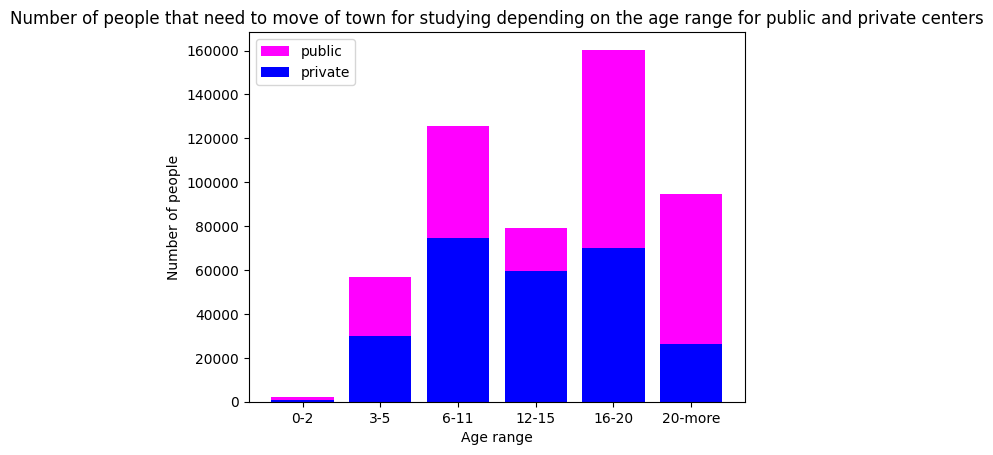

In [79]:
privat_2_less=len(datos_df[(datos_df["grup_edat"]=="2 o menys anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])
privat_3_5=len(datos_df[(datos_df["grup_edat"]=="De 3 a 5 anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])
privat_6_11=len(datos_df[(datos_df["grup_edat"]=="De 6 a 11 anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])
privat_12_15=len(datos_df[(datos_df["grup_edat"]=="De 12 a 15 anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])
privat_16_20=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])
privat_20_more=len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["naturalesa_centre"]=="PRIVAT")])

privat=[privat_2_less,privat_3_5,privat_6_11,privat_12_15,privat_16_20,privat_20_more]
plt.title("Number of people that need to move of town for studying depending on the age range for public and private centers")
plt.ylabel("Number of people")
plt.xlabel("Age range")
plt.bar(i,public,color="magenta",label="public")
plt.bar(i,privat,color="blue",label="private")
plt.legend()
plt.show() 


In [80]:
#formacion profesionl:FF
FF=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="FORMACIÓ PROFESSIONAL")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="FORMACIÓ PROFESSIONAL")])
#bachillerato:B
B=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="BATXILLERAT")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="BATXILLERAT")])
#educacion especial:EE
EE=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="EDUCACIÓ ESPECIAL")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="EDUCACIÓ ESPECIAL")])
#artes plasticas y diseño:AD
AD=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="ARTS PLÀSTIQUES I DISSENY")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="ARTS PLÀSTIQUES I DISSENY")])
#programa de formación e insercion:FI
FI=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="PROGRAMA DE FORMACIÓ I INSERCIÓ")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="PROGRAMA DE FORMACIÓ I INSERCIÓ")])
#itinerarios de formación específicos:FE
FE=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="ITINERARIS FORMATIUS ESPECÍFICS")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="ITINERARIS FORMATIUS ESPECÍFICS")])
#circ:C
C=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="CIRC")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="CIRC")])
#Educación secundaria:ES
ES=len(datos_df[(datos_df["grup_edat"]=="De 16 a 20 anys")&(datos_df["estudis"]=="EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA")])+len(datos_df[(datos_df["grup_edat"]=="Major de 20 anys")&(datos_df["estudis"]=="EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA")])






In [81]:
#Creamos una data frame
estudios_df = pd.DataFrame()
estudios_df["Type of study"]  = ["Eduación Secundaria Obligatoria","Itinerarios de Formación Específicos","Bachillerato","Circo",
                                 "Formación Profesional",  
                       "Educación especial","Artes Plásticas y Diseño",
                       "Programa de Formación e Inserción"]
estudios_df["Students"]=[ES,FE,B,C,FF,EE,AD,FI]
estudios_df


,Type of study,Students
0,Eduación Secundaria Obligatoria,15885
1,Itinerarios de Formación Específicos,2066
2,Bachillerato,68544
3,Circo,483
4,Formación Profesional,236846
5,Educación especial,6786
6,Artes Plásticas y Diseño,19023
7,Programa de Formación e Inserción,2087


In [82]:
estudios_df = estudios_df.set_index("Type of study")
estudios_df

,Students
Type of study,
Eduación Secundaria Obligatoria,15885
Itinerarios de Formación Específicos,2066
Bachillerato,68544
Circo,483
Formación Profesional,236846
Educación especial,6786
Artes Plásticas y Diseño,19023
Programa de Formación e Inserción,2087


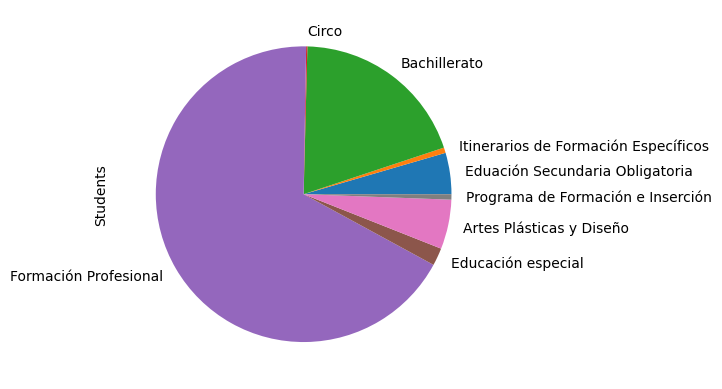

In [83]:
f, ax = plt.subplots()
estudios_df.plot.pie(y="Students", ax=ax)
plt.legend(loc=4, ncol=2)
ax.get_legend().remove()
plt.show()

In [13]:

datos_df=datos
#quitamos la columna de sexo y los códigos de municipios
datos_df=datos_df.drop(['sexe','codi_resid_ncia_municipi','codi_municipi_centre'], axis=1)

indice = []
for i in range(len(datos_df)):
    if ((datos_df["resid_ncia_municipi_alumne"][i])==(datos_df["municipi_centre"][i])):
        indice.append(i)
datos_df


#print(indice)
        

,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,2016/2017,De 3 a 5 anys,ABRERA,ABRERA,EDUCACIÓ INFANTIL,PÚBLIC,38
1,2016/2017,De 3 a 5 anys,ABRERA,ESPARREGUERA,EDUCACIÓ INFANTIL,PRIVAT,1
2,2016/2017,De 3 a 5 anys,ABRERA,L'HOSPITALET DE LLOBREGAT,EDUCACIÓ INFANTIL,PÚBLIC,1
3,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PRIVAT,8
4,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PÚBLIC,1
...,...,...,...,...,...,...,...
779879,2021/2022,Major de 20 anys,BADALONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779880,2021/2022,Major de 20 anys,BARCELONA,BARCELONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779881,2021/2022,Major de 20 anys,BARCELONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779882,2021/2022,Major de 20 anys,VIC,VIC,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [14]:



datos2_df=datos_df.drop(indice, axis=0)
datos2_df

,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
1,2016/2017,De 3 a 5 anys,ABRERA,ESPARREGUERA,EDUCACIÓ INFANTIL,PRIVAT,1
2,2016/2017,De 3 a 5 anys,ABRERA,L'HOSPITALET DE LLOBREGAT,EDUCACIÓ INFANTIL,PÚBLIC,1
3,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PRIVAT,8
4,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PÚBLIC,1
5,2016/2017,De 3 a 5 anys,ABRERA,SANT ESTEVE SESROVIRES,EDUCACIÓ INFANTIL,PÚBLIC,2
...,...,...,...,...,...,...,...
779866,2021/2022,Major de 20 anys,SABADELL,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
779869,2021/2022,Major de 20 anys,TORRELAVIT,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
779874,2021/2022,Major de 20 anys,LLEIDA,LES BORGES BLANQUES,FORMACIÓ PROFESSIONAL,PÚBLIC,1
779878,2021/2022,Major de 20 anys,SITGES,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1


In [87]:
#Separamos por cursos


groups=datos2_df.groupby(datos2_df.curs)
curs_16_17_df=groups.get_group("2016/2017")
curs_17_18_df=groups.get_group("2017/2018")
curs_18_19_df=groups.get_group("2018/2019")
curs_19_20_df=groups.get_group("2019/2020")
curs_20_21_df=groups.get_group("2020/2021")
curs_21_22_df=groups.get_group("2021/2022")



In [88]:
curs_16_17_df=curs_16_17_df.reset_index()
curs_17_18_df=curs_17_18_df.reset_index()
curs_18_19_df=curs_18_19_df.reset_index()
curs_19_20_df=curs_19_20_df.reset_index()
curs_20_21_df=curs_20_21_df.reset_index()
curs_21_22_df=curs_21_22_df.reset_index()



curs_16_17_df

,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,1,2016/2017,De 3 a 5 anys,ABRERA,ESPARREGUERA,EDUCACIÓ INFANTIL,PRIVAT,1
1,2,2016/2017,De 3 a 5 anys,ABRERA,L'HOSPITALET DE LLOBREGAT,EDUCACIÓ INFANTIL,PÚBLIC,1
2,3,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PRIVAT,8
3,4,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PÚBLIC,1
4,5,2016/2017,De 3 a 5 anys,ABRERA,SANT ESTEVE SESROVIRES,EDUCACIÓ INFANTIL,PÚBLIC,2
...,...,...,...,...,...,...,...,...
106071,134306,2016/2017,Major de 20 anys,SANT QUIRZE DEL VALLÈS,SABADELL,FORMACIÓ PROFESSIONAL,PÚBLIC,1
106072,134309,2016/2017,Major de 20 anys,LA SEU D'URGELL,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PRIVAT,1
106073,134311,2016/2017,Major de 20 anys,TORTOSA,FALSET,FORMACIÓ PROFESSIONAL,PÚBLIC,1
106074,134313,2016/2017,Major de 20 anys,L'HOSPITALET DE LLOBREGAT,EL PRAT DE LLOBREGAT,FORMACIÓ PROFESSIONAL,PÚBLIC,1


In [89]:
#Creamos una nueva data frame para cada curso
datos_16_17_df = pd.DataFrame()
datos_17_18_df = pd.DataFrame()
datos_18_19_df = pd.DataFrame()
datos_19_20_df = pd.DataFrame()
datos_20_21_df = pd.DataFrame()
datos_21_22_df = pd.DataFrame() 



In [90]:
#curs_16_17_df[(curs_16_17_df["grup_edat"]=="2 o menys anys")]

In [91]:
datos_16_17_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_16_17_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [92]:
import numpy as np
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_16_17_df)):
    if (curs_16_17_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_16_17_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_16_17_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_16_17_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_16_17_df["n_mero_matr_cules_estad_stica"][i])
                
datos_16_17_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_16_17_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2016/2017")
datos_16_17_df
    

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,1.0,0.0
1,De 3 a 5 años,11778.0,10834.0
2,De 6 a 11 años,25896.0,27729.0
3,De 12 a 15 años,29676.0,23762.0
4,De 16 a 20 años,45466.0,23543.0
5,Mayor de 20 años,20409.0,6051.0


In [93]:
datos_17_18_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_17_18_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [94]:
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_17_18_df)):
    if (curs_17_18_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_17_18_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_17_18_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_17_18_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_17_18_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_17_18_df["n_mero_matr_cules_estad_stica"][i])
                
datos_17_18_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_17_18_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2017/2018")
datos_17_18_df

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8738.0,9811.0
2,De 6 a 11 años,20807.0,26116.0
3,De 12 a 15 años,28699.0,23504.0
4,De 16 a 20 años,47379.0,26231.0
5,Mayor de 20 años,19538.0,6268.0


In [95]:
datos_18_19_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_18_19_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [96]:
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_18_19_df)):
    if (curs_18_19_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_18_19_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_18_19_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_18_19_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_18_19_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_18_19_df["n_mero_matr_cules_estad_stica"][i])
                
datos_18_19_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_18_19_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2018/2019")
datos_18_19_df

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8784.0,9358.0
2,De 6 a 11 años,21540.0,26107.0
3,De 12 a 15 años,30201.0,23501.0
4,De 16 a 20 años,49354.0,28113.0
5,Mayor de 20 años,18428.0,6178.0


In [97]:
datos_19_20_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_19_20_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [99]:
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_19_20_df)):
    if (curs_19_20_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_19_20_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_19_20_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_19_20_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_19_20_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_19_20_df["n_mero_matr_cules_estad_stica"][i])
                
datos_19_20_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_19_20_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2019/2020")
datos_19_20_df

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,9020.0,9403.0
2,De 6 a 11 años,21789.0,25531.0
3,De 12 a 15 años,31056.0,23102.0
4,De 16 a 20 años,51888.0,29361.0
5,Mayor de 20 años,17809.0,5893.0


In [100]:
datos_20_21_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_20_21_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [101]:
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_20_21_df)):
    if (curs_20_21_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_20_21_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_20_21_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_20_21_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_20_21_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_20_21_df["n_mero_matr_cules_estad_stica"][i])
                
datos_20_21_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_20_21_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2020/2021")
datos_20_21_df

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8802.0,8836.0
2,De 6 a 11 años,21772.0,23927.0
3,De 12 a 15 años,31812.0,21712.0
4,De 16 a 20 años,54331.0,29907.0
5,Mayor de 20 años,16923.0,5539.0


In [102]:
datos_21_22_df["Grupo de edad"] = ["2 años o menos","De 3 a 5 años","De 6 a 11 años","De 12 a 15 años","De 16 a 20 años","Mayor de 20 años"]
datos_21_22_df

,Grupo de edad
0,2 años o menos
1,De 3 a 5 años
2,De 6 a 11 años
3,De 12 a 15 años
4,De 16 a 20 años
5,Mayor de 20 años


In [103]:
publico=np.zeros(6)
privado=np.zeros(6)
for i in range(len(curs_21_22_df)):
    if (curs_21_22_df["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_21_22_df["grup_edat"][i]=="2 o menys anys"):
             publico[0]=publico[0]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 3 a 5 anys"):
             publico[1]=publico[1]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 6 a 11 anys"):
             publico[2]=publico[2]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 12 a 15 anys"):
             publico[3]=publico[3]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 16 a 20 anys"):
             publico[4]=publico[4]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="Major de 20 anys"):
             publico[5]=publico[5]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
    if (curs_21_22_df["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_21_22_df["grup_edat"][i]=="2 o menys anys"):
             privado[0]=privado[0]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 3 a 5 anys"):
             privado[1]=privado[1]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 6 a 11 anys"):
             privado[2]=privado[2]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 12 a 15 anys"):
             privado[3]=privado[3]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="De 16 a 20 anys"):
             privado[4]=privado[4]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_df["grup_edat"][i]=="Major de 20 anys"):
             privado[5]=privado[5]+int(curs_21_22_df["n_mero_matr_cules_estad_stica"][i])
                
datos_21_22_df["Centro Publico"] = [publico[0],publico[1],publico[2],publico[3],publico[4],publico[5]]
datos_21_22_df["Centro Privado"] = [privado[0],privado[1],privado[2],privado[3],privado[4],privado[5]]

print("Curso: 2021/2022")
datos_21_22_df

,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,1086.0,624.0
1,De 3 a 5 años,8846.0,8762.0
2,De 6 a 11 años,22269.0,23668.0
3,De 12 a 15 años,31713.0,21060.0
4,De 16 a 20 años,57382.0,30611.0
5,Mayor de 20 años,17334.0,5735.0


In [108]:
print("Curso: 2016/2017")
datos_16_17_df

Curso: 2016/2017


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,1.0,0.0
1,De 3 a 5 años,11778.0,10834.0
2,De 6 a 11 años,25896.0,27729.0
3,De 12 a 15 años,29676.0,23762.0
4,De 16 a 20 años,45466.0,23543.0
5,Mayor de 20 años,20409.0,6051.0


In [109]:
print("Curso: 2017/2018")
datos_17_18_df

Curso: 2017/2018


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8738.0,9811.0
2,De 6 a 11 años,20807.0,26116.0
3,De 12 a 15 años,28699.0,23504.0
4,De 16 a 20 años,47379.0,26231.0
5,Mayor de 20 años,19538.0,6268.0


In [110]:
print("Curso: 2018/2019")
datos_18_19_df

Curso: 2018/2019


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8784.0,9358.0
2,De 6 a 11 años,21540.0,26107.0
3,De 12 a 15 años,30201.0,23501.0
4,De 16 a 20 años,49354.0,28113.0
5,Mayor de 20 años,18428.0,6178.0


In [111]:
print("Curso: 2019/2020")
datos_19_20_df

Curso: 2019/2020


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,9020.0,9403.0
2,De 6 a 11 años,21789.0,25531.0
3,De 12 a 15 años,31056.0,23102.0
4,De 16 a 20 años,51888.0,29361.0
5,Mayor de 20 años,17809.0,5893.0


In [112]:
print("Curso: 2020/2021")
datos_20_21_df

Curso: 2020/2021


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,0.0,0.0
1,De 3 a 5 años,8802.0,8836.0
2,De 6 a 11 años,21772.0,23927.0
3,De 12 a 15 años,31812.0,21712.0
4,De 16 a 20 años,54331.0,29907.0
5,Mayor de 20 años,16923.0,5539.0


In [113]:
print("Curso: 2021/2022")
datos_21_22_df

Curso: 2021/2022


,Grupo de edad,Centro Publico,Centro Privado
0,2 años o menos,1086.0,624.0
1,De 3 a 5 años,8846.0,8762.0
2,De 6 a 11 años,22269.0,23668.0
3,De 12 a 15 años,31713.0,21060.0
4,De 16 a 20 años,57382.0,30611.0
5,Mayor de 20 años,17334.0,5735.0


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2 años o menos'),
  Text(1, 0, 'De 3 a 5 años'),
  Text(2, 0, 'De 6 a 11 años'),
  Text(3, 0, 'De 12 a 15 años'),
  Text(4, 0, 'De 16 a 20 años'),
  Text(5, 0, 'Mayor de 20 años')])

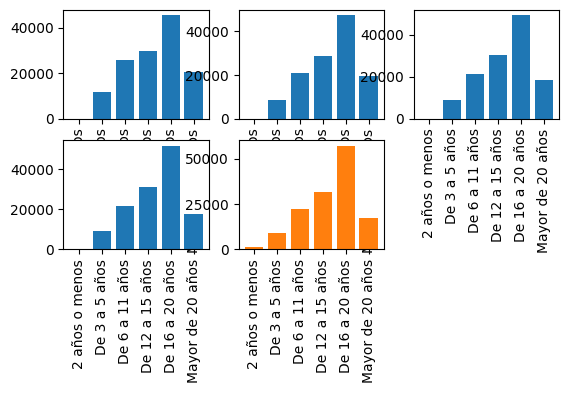

In [120]:
import matplotlib.pyplot as plt
plt.subplot(3, 3, 1)
plt.bar(datos_16_17_df["Grupo de edad"], datos_16_17_df["Centro Publico"])
plt.xticks(rotation="vertical")
plt.subplot(3, 3, 2)
plt.bar(datos_17_18_df["Grupo de edad"], datos_17_18_df["Centro Publico"])
plt.xticks(rotation="vertical")
plt.subplot(3, 3, 3)
plt.bar(datos_18_19_df["Grupo de edad"], datos_18_19_df["Centro Publico"])
plt.xticks(rotation="vertical")
plt.subplot(3, 3, 4)
plt.bar(datos_19_20_df["Grupo de edad"], datos_19_20_df["Centro Publico"])
plt.xticks(rotation="vertical")
plt.subplot(3, 3, 5)
plt.bar(datos_20_21_df["Grupo de edad"], datos_20_21_df["Centro Publico"])
plt.xticks(rotation="vertical")
plt.subplot(3, 3, 5)
plt.bar(datos_21_22_df["Grupo de edad"], datos_21_22_df["Centro Publico"])
plt.xticks(rotation="vertical")